# Predicting Fradulent Activity through Data Analysis


## Introduction
    
   The dataset used will be Audit Data, which was collected by the Comptroller and Auditor General of India for the 2015-2016 year from the Auditor General Office of the CAG. The data features information from 777 different firms across 46 different cities and 14 different industry sectors. Auditing is the practice of examining businesses' financial records compared to their financial statements to ensure they are in compliance with India's accounting laws. The purpose of the project centers on the prevention of fraudulent data activity. In the long term the prediction could help the impact it may cause to the economy and individuals on that society.
 The question we will be trying to answer in this data analysis is: *“Can the status of fraud in an Indian firm be predicted based on Money_Value and TOTAL?”*. 

## Preliminary exploratory data analysis

### Reading the data

In [1]:
library(tidyverse)
library(tidymodels)
library(repr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
audit_trial <- read_csv("audit_data/trial.csv")%>%
    select(Money_Value, TOTAL, Risk) %>%
    mutate(Risk = as.factor(Risk))

audit_split <- initial_split(audit_trial, prop = 0.75, strata = Risk)
audit_training <- training(audit_split)
audit_testing <- testing(audit_split)

Parsed with column specification:
cols(
  Sector_score = col_double(),
  LOCATION_ID = col_character(),
  PARA_A = col_double(),
  SCORE_A = col_double(),
  PARA_B = col_double(),
  SCORE_B = col_double(),
  TOTAL = col_double(),
  numbers = col_double(),
  Marks = col_double(),
  Money_Value = col_double(),
  MONEY_Marks = col_double(),
  District = col_double(),
  Loss = col_double(),
  LOSS_SCORE = col_double(),
  History = col_double(),
  History_score = col_double(),
  Score = col_double(),
  Risk = col_double()
)



In [3]:
audit_recipe <- recipe(Risk ~., data = audit_training) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

In [4]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) %>%
       set_engine("kknn") %>%
       set_mode("classification")

In [5]:
audit_workflow <- workflow() %>%
       add_recipe(audit_recipe) %>%
       add_model(knn_spec)%>%
       fit(data= audit_training)

### Training Data Visualization

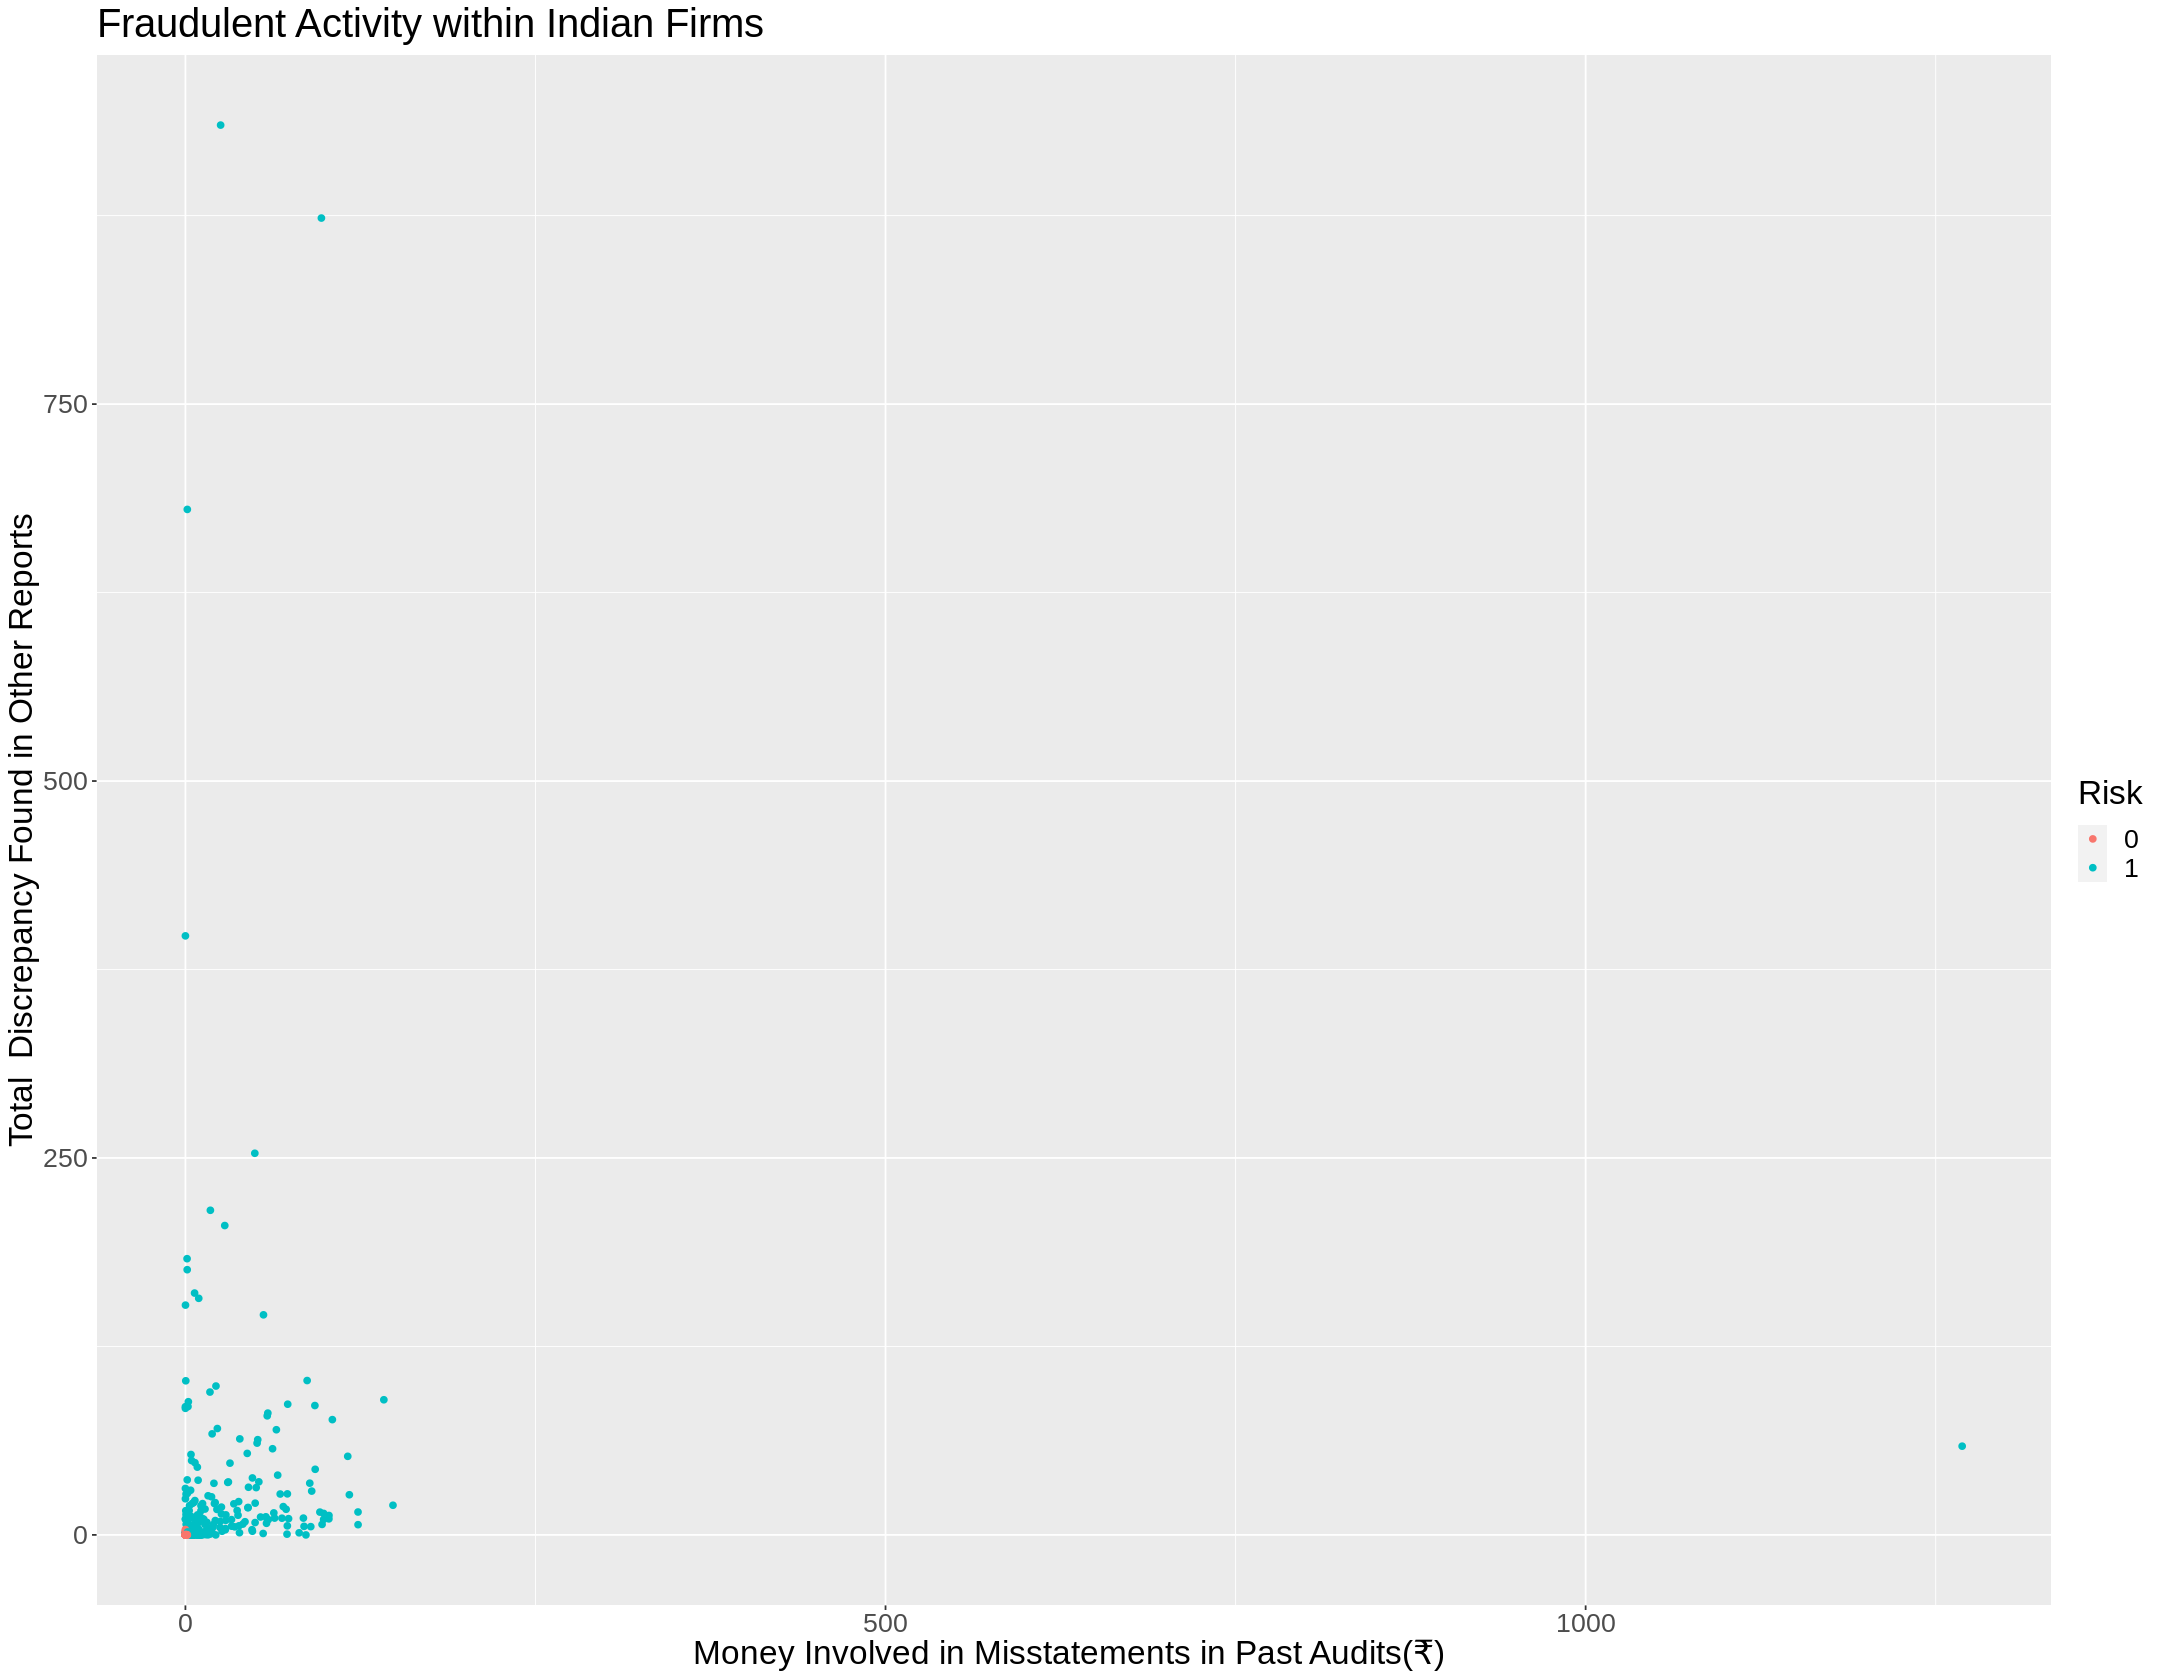

In [6]:
options(repr.plot.width=18, repr.plot.height=14)
audit_plot <- ggplot(audit_training, (aes(x= TOTAL , y= Money_Value, colour = Risk))) +
        geom_point() + 
        labs(x = "Money Involved in Misstatements in Past Audits(₹) ", y = "Total  Discrepancy Found in Other Reports", colour = 'Risk') +
        ggtitle("Fraudulent Activity within Indian Firms") +
        theme(text = element_text(size = 20))
audit_plot

### Training Data Summary Tables

In [7]:
missing_values <- filter(audit_training, TOTAL == 1)
summary <- summarize(audit_training, mean_mv = mean(Money_Value), mean_t = mean(TOTAL), count = nrow(audit_training))

missing_values
summary

Money_Value,TOTAL,Risk
<dbl>,<dbl>,<fct>
0.36,1,1


mean_mv,mean_t,count
<dbl>,<dbl>,<int>
14.76695,13.94946,583


There is only one missing value in the TOTAL column, which is shown in the first table. The mean of Money_Value, TOTAL and the number of observations are in the second table repectively.

## Methods

After a preliminary investigation into the paper utilizing this data we determined the most important factors were Score A, Score B, Money Value, Total, Loss, and History. However, to improve the final data visualization of the project we narrowed it down to two factors:  the amount of money involved in misstatements in past audits (Money_Value), and the total amount of discrepancy found in past audit report (TOTAL). To visualize the data, we plan on using a scatter plot with fraudulent and non-fraudulent firms color coded with the two predictors on the axes. 


## Expected Outcomes and Significance
Through this project, we expect to find If we can use the amount of money involved in misstatements and the total amount of discrepancy found in past audit reports to predict whether a firm is fraudulent or not.
<br>Our findings could help auditors conduct risk assessment through identification of anomalies and trends and then point out items they need to investigate further, as a result, they can improve their models for auditing. Besides, our findings can provide evidence and statistical support for possible legal policies and actions imposed upon firms that are predicted to be fraudulent.
<br>This project could lead to the question that if there are other variables that can be looked at that help provide a more accurate prediction. In addition, whether there are any trends in fraudulent firms or not and how these patterns can be more easily detected are to be explored further in future studies.